### KNN

KNN Algorithm is based on feature similarity.

How closely a sample set of features resemble our training set determines how we classify a given data point:

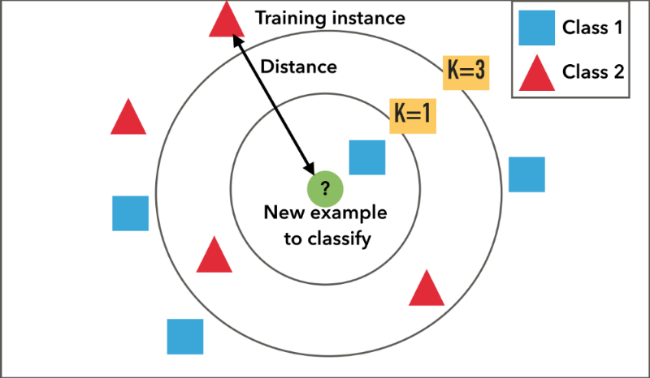

In [1]:
from IPython.display import Image
Image(filename='imgr15.png',width=470, height=470) 

The test sample (inside circle) should be classified either to the first class of blue squares or to the second class of red triangles. If k = 3 (outside circle) it is assigned to the second class because there are 2 triangles and only 1 square inside the inner circle. If, for example k = 5 it is assigned to the first class (3 squares vs. 2 triangles outside the outer circle).

`APPROACH` An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.

- KNN can be used for classification — the output is a class membership (predicts a class — a discrete value)


- It can also be used for regression — output is the value for the object (predicts continuous values). This value is the average (or median) of the values of its k nearest neighbors.

`DESCRIPTION`

The model for kNN is the entire training dataset. When a prediction is required for a unseen data instance, the kNN algorithm will search through the training dataset for the k-most similar instances. The prediction attribute of the most similar instances is summarized and returned as the prediction for the unseen instance.

The similarity measure is dependent on the type of data. For real-valued data, the Euclidean distance can be used. Other other types of data such as categorical or binary data, Hamming distance can be used.

In the case of regression problems, the average of the predicted attribute may be returned. In the case of classification, the most prevalent class may be returned.

Lazy learning refers to the fact that the algorithm does not build a model until the time that a prediction is required. It is lazy because it only does work at the last second. This has the benefit of only including data relevant to the unseen data, called a localized model. A disadvantage is that it can be computationally expensive to repeat the same or similar searches over larger training datasets.

Finally, kNN is powerful because it does not assume anything about the data, other than a distance measure can be calculated consistently between any two instances. As such, it is called non-parametric or non-linear as it does not assume a functional form.


`USE CASES : `

__A__ Credit ratings — collecting financial characteristics vs. comparing people with similar financial features to a database. By the very nature of a credit rating, people who have similar financial details would be given similar credit ratings. Therefore, they would like to be able to use this existing database to predict a new customer’s credit rating, without having to perform all the calculations.


__B__ Should the bank give a loan to an individual? Would an individual default on his or her loan? Is that person closer in characteristics to people who defaulted or did not default on their loans?


__C__ To Detemine Election results say, “vote Democrat” or “vote Republican”.


__D__ Handwriting detection (like OCR), image recognition

`ALGORITHM: `
1. A positive integer k is specified, along with a new sample

2. We select the k entries in our database which are closest to the new sample

3. We find the most common classification of these entries

4. This is the classification we give to the new sample


`SUMMARY: ` 
A few other features of KNN:

1. KNN stores the entire training dataset which it uses as its representation.
2. KNN does not learn any model.
3. KNN makes predictions just-in-time by calculating the similarity between an input sample and each training instance

`Methods of calculating distance between points`

The first step is to calculate the distance between the new point and each training point. There are various methods for calculating this distance, of which the most commonly known methods are --

-  Euclidian, Manhattan (for continuous) 
-  Hamming distance (for categorical)

1. __Euclidean Distance__: Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (y).

2. __Manhattan Distance__: This is the distance between real vectors using the sum of their absolute difference.

3. __Hamming Distance__: It is used for categorical variables. If the value (x) and the value (y) are same, the distance D will be equal to 0 . Otherwise D=1.

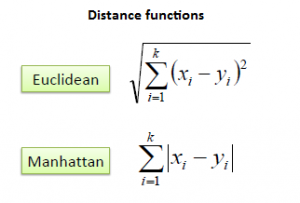

In [3]:
Image(filename='imgr16.png',width=270, height=270) 

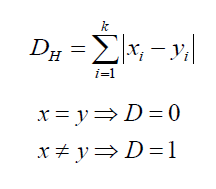

In [7]:
Image(filename='imgr17.png',width=180, height=180) 

Once the distance of a new observation from the points in our training set has been measured, the next step is to pick the closest points. The number of points to be considered is defined by the value of k.

The second step is to select the k value. This determines the number of neighbors we look at when we assign a value to any new observation.

Here is the basic idea:

- For each point in our training set, calculate the distance to our mystery point.
- Get the top K closet points (nearest neighbors)
- Return the label found most of often in the top K points

`Optional Parameters of KNN`

1. __n_neighbors__ --> This is an integer parameter that gives our algorithm the number of k to choose. By default k = 5, and in practice a better k is always between 3–10.

2. __weights__ --> Since the prediction is made based on the votes of the nearest points, all the other points in the dataset are completely ignored. The best way to solve this is by introducing weights. If we don’t define weights, _uniform_ will be automatically used. This works by weighting all points in each neighborhood equally. Distance is another option for weights, which uses a principle of closer neighbors having more influence than ones further away.

3. __algorithm__ --> _auto_ is the default algorithm used in this method, but there are other options: kd_tree and ball_tree. Both of these algorithms help to execute fast nearest neighbor searches in KNN. The ultimate difference between them is that ball_tree works with more distance metrics than kd_tree.

4. __leaf_size__ --> (default = 40). This affects the speed of construction and query. The amount of memory needed to store the tree scales as approximately n_samples / leaf_size

5. __p__ --> power parameter for Minkowski metric if p=2 it is equivalent to using euclidean distance and if p=1 it is equivalent to using manhattan distance

6. __metric__ --> the distance metric 

7. __n_jobs__  --> the number of parallel jobs to run for neighbors search.

Common Applications include credit scoring, prediction of cancer cells, image recognition and many other applications

### `CASE STUDY` -- __Building a credit scoring model using KNN__

In this case study, we’re going to classify whether a person of age of 43 who borrowed a loan of $60,000 is going to repay the loan or default. Our labels are 1 for default and 0 for repay. First we’re going to create a numpy array with training data, with age and amount borrowed as our prediction variables and default as the label.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

In [2]:
KNeighborsClassifier?

In [3]:
tic=time.time()
full_data=pd.read_csv('/Users/ankitasinha/Desktop/data/creditcard.csv')
full_data=full_data.sample(frac=1) #Randomize the whole dataset
full_features=full_data.drop(["Time","Class"],axis=1)
full_labels=pd.DataFrame(full_data[["Class"]])
full_features_array=full_features.values
full_labels_array=full_labels.values
train_features,test_features,train_labels,test_labels=train_test_split(full_features_array,full_labels_array,train_size=0.90)
test_features=normalize(test_features)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
kmeans=KMeans(n_clusters=2,random_state=0,algorithm="auto",max_iter=10000,n_jobs=-1)
kmeans.fit(train_features)
kmeans_predicted_train_labels=kmeans.predict(train_features)

In [5]:
#confusion matrix
# tn fp
# fn tp
print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")
tn,fp,fn,tp=confusion_matrix(train_labels,kmeans_predicted_train_labels).ravel()


tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives


In [6]:
reassignflag=False
if tn+tp<fn+fp:
    # clustering is opposite of original classification
    reassignflag=True
kmeans_predicted_test_labels=kmeans.predict(test_features)
if reassignflag:
    kmeans_predicted_test_labels=1-kmeans_predicted_test_labels

In [7]:
#calculating confusion matrix for kmeans
tn,fp,fn,tp=confusion_matrix(test_labels,kmeans_predicted_test_labels).ravel()
#scoring kmeans
kmeans_accuracy_score=accuracy_score(test_labels,kmeans_predicted_test_labels)
kmeans_precison_score=precision_score(test_labels,kmeans_predicted_test_labels)
kmeans_recall_score=recall_score(test_labels,kmeans_predicted_test_labels)
kmeans_f1_score=f1_score(test_labels,kmeans_predicted_test_labels)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
print("")
print("K-Means")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",kmeans_accuracy_score)
print("Precison -->",kmeans_precison_score)
print("Recall -->",kmeans_recall_score)
print("F1 -->",kmeans_f1_score)


K-Means
Confusion Matrix
tn = 28439 fp = 0
fn = 42 tp = 0
Scores
Accuracy --> 0.9985253326779256
Precison --> 0.0
Recall --> 0.0
F1 --> 0.0


In [23]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree",n_jobs=-1)
knn.fit(train_features,train_labels.ravel())
knn_predicted_test_labels=knn.predict(test_features)
#calculating confusion matrix for knn
tn,fp,fn,tp=confusion_matrix(test_labels,knn_predicted_test_labels).ravel()
#scoring knn
knn_accuracy_score=accuracy_score(test_labels,knn_predicted_test_labels)
knn_precison_score=precision_score(test_labels,knn_predicted_test_labels)
knn_recall_score=recall_score(test_labels,knn_predicted_test_labels)
knn_f1_score=f1_score(test_labels,knn_predicted_test_labels)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
print("")
print("K-Nearest Neighbours")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)


K-Nearest Neighbours
Confusion Matrix
tn = 28439 fp = 0
fn = 42 tp = 0
Scores
Accuracy --> 0.9985253326779256
Precison --> 0.0
Recall --> 0.0
F1 --> 0.0


In [25]:
#time elapsed
toc=time.time()
elapsedtime=toc-tic
print("")
print("Time Taken : "+str(elapsedtime)+"seconds")


Time Taken : 810.6065039634705seconds


In [12]:
confusion_matrix(test_labels, knn_predicted_test_labels)

array([[28439,     0],
       [   42,     0]])

In [13]:
y_test=np.squeeze(test_labels)

In [14]:
knn_predicted_test_labels

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
import pandas as pd
df = pd.DataFrame({'test_labels' : y_test,
                  'knn_predicted_test_labels' : knn_predicted_test_labels})

pd.crosstab(df.test_labels, df.knn_predicted_test_labels, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,28390,39,28429
1,52,0,52
All,28442,39,28481


In [15]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, knn_predicted_test_labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28439
          1       0.00      0.00      0.00        42

avg / total       1.00      1.00      1.00     28481



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, knn_predicted_test_labels)

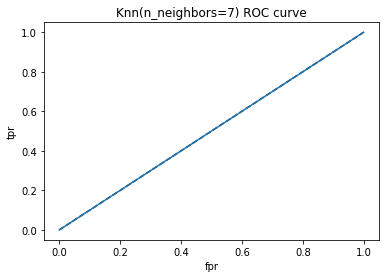

In [27]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [20]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels, knn_predicted_test_labels)

0.5

Our results using KNN predict the person as a non defaulter. This is simply because our model classified the person as having more similar characteristics or features (age and amount of loan) to those who didn’t default their loan rather than those who defaulted.